In [5]:
    import xarray as xr
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import glob
    import local_read_functions as lrf
    import warnings
    warnings.simplefilter("ignore")

In [6]:
# This notebook takes shows some ways to use local_read_functions to 
# read in cmip6 data on eos9 with xarray.

# local_cmip6_read
# this function can read in cmip6 results from the local archive
# currently must specify experiment, model, variable, and variable table
# future updates will allow for lists of experiments, models, and variables

#Default functionality reads in all ensemble members
ds=lrf.local_cmip6_read(exp='historical',model='CESM2',variable='tas',
                       freq='Amon')
ds

<xarray.Dataset>
Dimensions:    (ensemble: 11, lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: ensemble, nbnd
Data variables:
    tas        (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    time_bnds  (ensemble, time, nbnd) object dask.array<chunksize=(1, 600, 2), meta=np.ndarray>
    lat_bnds   (ensemble, lat, nbnd, time) float64 dask.array<chunksize=(1, 192, 2, 600), meta=np.ndarray>
    lon_bnds   (ensemble, lon, nbnd, time) float64 dask.array<chunksize=(1, 288, 2, 600), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001


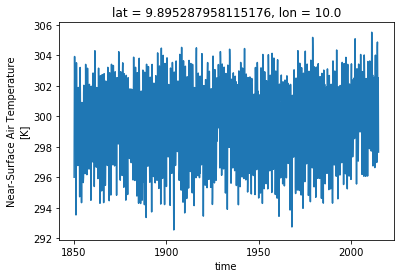

In [9]:
#From here you can choose to plot a time series of single ensemble member at a point
#selects the data variable
t10=ds.tas
#makes sure that the attributes from the original variable carry over to the newly assigned values
t10.attrs=ds.tas.attrs
#select a single (lat,lon) point by latitude and longitude
t10ts=t10.sel(lat=10,lon=10, method='nearest')
#for a single ensemble
t10tsr1=t10ts.isel(ensemble=1)
#simply plotting in xarray
t10tsr1.plot()

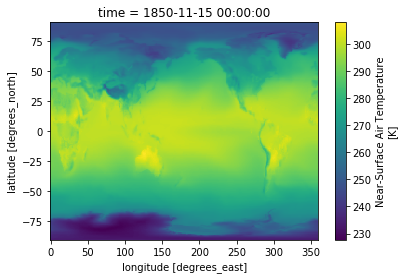

In [10]:
#Or plot a single ensemble member at a given time
t10xyr1=t10.isel(time=10,ensemble=1)
t10xyr1.plot()

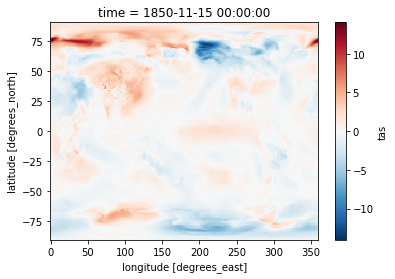

In [11]:
#And see how its different from a different ensemble member
t10xyr5=t10.isel(time=10,ensemble=5)
tdif=t10xyr5-t10xyr1
tdif.plot()

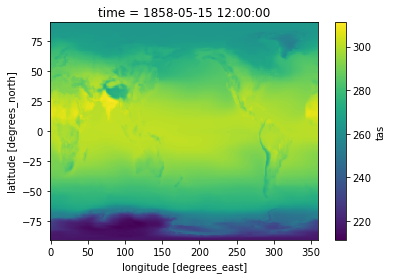

In [20]:
# Or calculate ensemble mean
t10m=np.mean(t10,0)
#t10m
t10mxy=t10m.isel(time=100)
t10mxy.plot()

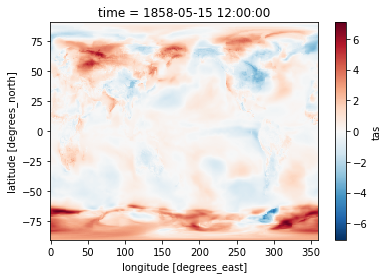

In [21]:
#And the difference of any ensemble from the mean
t10xyr7=t10.isel(time=100,ensemble=7)
tr7m=t10xyr7-t10mxy
tr7m.plot()

In [14]:
#In the read function, you can specify a single ensemble
ds=lrf.local_cmip6_read(exp='historical',model='CESM2',variable='tas',
                       freq='Amon',no_esm=[1])
ds

<xarray.Dataset>
Dimensions:    (ensemble: 1, lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: ensemble, nbnd
Data variables:
    tas        (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 192, 288), meta=np.ndarray>
    time_bnds  (ensemble, time, nbnd) object dask.array<chunksize=(1, 1980, 2), meta=np.ndarray>
    lat_bnds   (ensemble, lat, nbnd) float32 dask.array<chunksize=(1, 192, 2), meta=np.ndarray>
    lon_bnds   (ensemble, lon, nbnd) float32 dask.array<chunksize=(1, 288, 2), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:         

In [15]:
# or specific ensemble members
ds=lrf.local_cmip6_read(exp='historical',model='CESM2',variable='tas',
                       freq='Amon',no_esm=[1,2,7])
ds

<xarray.Dataset>
Dimensions:    (ensemble: 3, lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: ensemble, nbnd
Data variables:
    tas        (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    time_bnds  (ensemble, time, nbnd) object dask.array<chunksize=(1, 600, 2), meta=np.ndarray>
    lat_bnds   (ensemble, lat, nbnd, time) float32 dask.array<chunksize=(1, 192, 2, 600), meta=np.ndarray>
    lon_bnds   (ensemble, lon, nbnd, time) float32 dask.array<chunksize=(1, 288, 2, 600), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
 

In [8]:
#Also included in the function file is another function that calculates
#the number of ensemble members
ne=lrf.find_num_ensembles(exp='historical',model='CESM2',variable='tas',
                       freq='Amon')
ne

11